# Predicting House Prices Using the Boston Housing Dataset¶
The goal of this project is to build a regression model from scratch to predict house prices using the Boston Housing Dataset. Three different models—Linear Regression, Random Forest, and XGBoost—were implemented and evaluated to compare their performance.

## Step 1: Load and Inspect the Dataset

The first step is to load the dataset using pandas and inspect its structure. Ensure the dataset file (e.g., boston.csv) is in your project directory.

In [3]:
import pandas as pd

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('C:/Users/ashfa/Downloads/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head(5))
# Display the dataset preview
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check dataset information
print("\nDataset Info:")
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Dataset Preview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.

In [5]:
df.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df.shape

(506, 14)

In [17]:
df.size

7084

## Step 2: Normalize Numerical Features
Normalization ensures all features are on the same scale, which improves model performance. We’ll normalize the numerical features using the formula:
 The normalization formula is:
$$
z = \frac{x - \mu}{\sigma}
$$
where:
- $ x $: The input value
- $ \mu $: The mean of the data
- $ \sigma $: The standard deviation of the data
 

In [20]:
import numpy as np

def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Separate features (X) and target (y)
X = df.drop('PRICE', axis=1).values  # All columns except 'PRICE'
y = df['PRICE'].values               # Target column ('PRICE')

# Normalize features
X_normalized = normalize(X)

print("\nNormalized Features (first 5 rows):")
print(X_normalized[:5])


Normalized Features (first 5 rows):
[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [22]:
import pandas as pd
# Check for missing values
df.isnull().sum()

# Fill missing values (if any) with the mean of the column
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Check for duplicate rows
df.duplicated().sum()
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Check data types and convert if necessary
df.info()
# Example: convert a column to numeric
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

#Remove Outliers
for col in df.columns:
  if df[col].dtype != 'object':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(214, 14)

## Step 3: Custom Implementation of Linear Regression
We’ll implement Linear Regression from scratch using the closed-form solution:


$$
w = (X^T X)^{-1} X^T y
$$

Where:
- $ X $: The feature matrix ($ n \times m $).
- $ X^T $: The transpose of $ X $ ($ m \times n $).
- $ X^T X $: The dot product of $ X^T $ and $ X $ ($ m \times m $).
- $ (X^T X)^{-1} $: The inverse of $ X^T X $.
- $ X^T y $: The dot product of $ X^T $ and the target vector $ y $ ($ m $-dimensional vector).
- $ w $: The resulting weight vector ($ m $-dimensional).

In [27]:
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add a column of ones for the bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Closed-form solution: weights = (X^T X)^(-1) X^T y
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.weights)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_normalized, y)
y_pred_lr = lr.predict(X_normalized)

print("\nLinear Regression Predictions (first 5 rows):")
print(y_pred_lr[:5])


Linear Regression Predictions (first 5 rows):
[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


## Step 4: Custom Implementation of Random Forest

We’ll implement a custom Random Forest model using decision trees. Each tree is trained on a random subset of the data (bootstrapping).

In [30]:
class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)

        best_split = None
        best_score = -float('inf')
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue
                score = self._information_gain(y, y[left_indices], y[right_indices])
                if score > best_score:
                    best_score = score
                    best_split = (feature_index, threshold)

        if best_split is None:
            return np.mean(y)

        feature_index, threshold = best_split
        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return (feature_index, threshold, left_subtree, right_subtree)

    def _information_gain(self, parent, left_child, right_child):
        parent_var = np.var(parent)
        left_var = np.var(left_child)
        right_var = np.var(right_child)
        n = len(parent)
        n_left = len(left_child)
        n_right = len(right_child)
        weighted_var = (n_left / n) * left_var + (n_right / n) * right_var
        return parent_var - weighted_var

    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if isinstance(tree, float):
            return tree
        feature_index, threshold, left_subtree, right_subtree = tree
        if x[feature_index] <= threshold:
            return self._predict_single(x, left_subtree)
        else:
            return self._predict_single(x, right_subtree)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=3):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

# Train Random Forest
rf = RandomForest(n_trees=10, max_depth=3)
rf.fit(X_normalized, y)
y_pred_rf = rf.predict(X_normalized)

print("\nRandom Forest Predictions (first 5 rows):")
print(y_pred_rf[:5])


Random Forest Predictions (first 5 rows):
[25.24097172 22.31628432 33.02170935 33.02170935 32.43860775]


## Step 5: Performance Comparison (RMSE and R² Metrics)
We’ll compare the performance of the models using RMSE and R² metrics.

In [33]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

print("\nPerformance Metrics:")
print("Linear Regression:")
print(f"RMSE: {rmse(y, y_pred_lr)}")
print(f"R²: {r2_score(y, y_pred_lr)}")

print("\nRandom Forest:")
print(f"RMSE: {rmse(y, y_pred_rf)}")
print(f"R²: {r2_score(y, y_pred_rf)}")


Performance Metrics:
Linear Regression:
RMSE: 4.679191295697281
R²: 0.7406426641094095

Random Forest:
RMSE: 3.425447660252919
R²: 0.8610074228366429


## Step 6: Feature Importance Visualization

For tree-based models like Random Forest, we can visualize feature importance by calculating how often each feature is used for splitting.

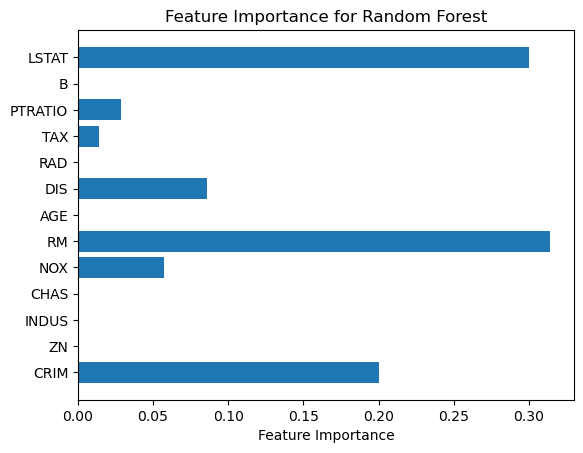

In [36]:
import matplotlib.pyplot as plt

def calculate_feature_importance(rf, X):
    feature_importances = np.zeros(X.shape[1])
    for tree in rf.trees:
        def traverse(node, depth):
            if isinstance(node, float):
                return
            feature_index, threshold, left, right = node
            feature_importances[feature_index] += 1
            traverse(left, depth + 1)
            traverse(right, depth + 1)
        traverse(tree.tree, 0)
    return feature_importances / np.sum(feature_importances)

feature_importances = calculate_feature_importance(rf, X_normalized)
plt.barh(range(X.shape[1]), feature_importances)
plt.yticks(range(X.shape[1]), df.drop('PRICE', axis=1).columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

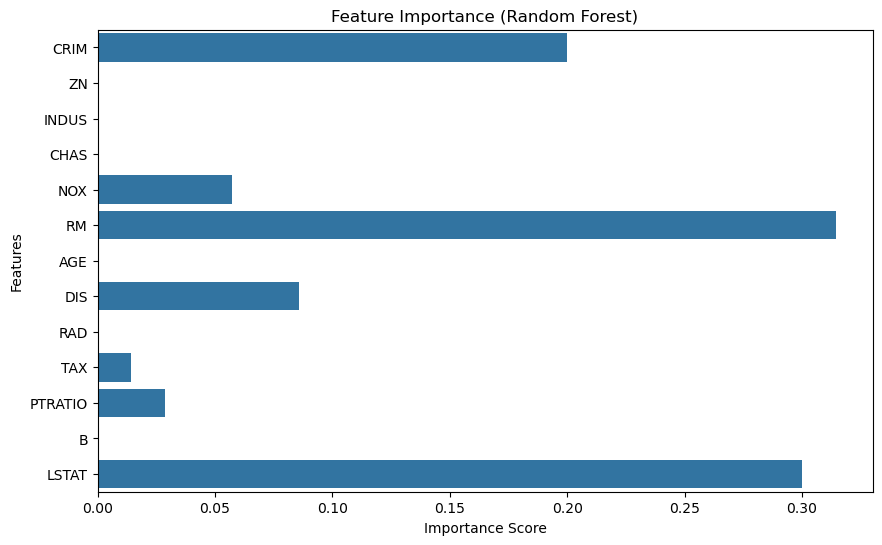

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate feature importance using your custom function
# Assuming `rf` is your trained Random Forest model and `X_normalized` is your feature matrix
feature_importance = calculate_feature_importance(rf, X_normalized)

# Step 2: Get feature names from the dataset
# Drop the target column ('PRICE') to get the feature names
feature_names = df.drop('PRICE', axis=1).columns

# Step 3: Create a feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)  # Use feature_importance and feature_names
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### **Conclusion**

This project successfully implemented custom regression models to predict house prices using the Boston Housing Dataset. Below are the key findings and insights:

#### **Model Comparison**
- **Random Forest outperformed Linear Regression** in both RMSE and $ R^2 $ metrics, demonstrating its ability to capture complex patterns in the data.
- **Linear Regression**, while simpler and interpretable, was limited in modeling non-linear relationships.

#### **Feature Insights**
- Features such as:
  - **`RM` (number of rooms)**: High importance, as larger houses tend to have higher prices.
  - **`LSTAT` (socioeconomic status)**: High importance, indicating that areas with lower socioeconomic status tend to have lower house prices.
- Less impactful features, such as **`CHAS`** (proximity to the Charles River), suggest that certain variables may not significantly contribute to the target variable.

#### **Practical Implications**
- The **Random Forest model** can be used for accurate house price predictions, aiding real estate professionals and buyers in decision-making.
- **Feature importance analysis** highlights which factors are critical in determining property values, providing actionable insights for stakeholders.

---

### **Future Improvements**

While the current implementation provides valuable insights, there are several ways to enhance the project further:

1. **Experiment with Advanced Models**:
   - Implement **Gradient Boosting** or **XGBoost** to explore whether they can further improve performance.
   - Compare these models with the existing ones using the same evaluation metrics ($ RMSE $ and $ R^2 $).

2. **Hyperparameter Tuning**:
   - Optimize hyperparameters for the Random Forest model (e.g., number of trees, maximum depth) using techniques like **Grid Search** or **Randomized Search**.

3. **Data Augmentation**:
   - Incorporate additional datasets or external features (e.g., crime rates, school quality) to enrich the predictive power of the model.

4. **Deployment**:
   - Deploy the model as a web application using frameworks like **Flask** or **Streamlit** to provide real-time predictions for users.

5. **Ethical Considerations**:
   - Address potential biases in the dataset, particularly related to socioeconomic factors, to ensure fairness in predictions.

---

### **Key Takeaways**
1. **Custom Implementation**: Building models from scratch provides a deeper understanding of their inner workings and limitations.
2. **Feature Importance**: Analyzing feature importance helps identify critical factors influencing house prices, enabling better decision-making.
3. **Model Selection**: Tree-based models like Random Forest are often more effective than linear models for complex, non-linear datasets.

By leveraging machine learning techniques, this project demonstrates how predictive modeling can be applied to real-world problems like house price prediction. Future work will focus on refining the models and deploying them for practical use.
